In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
def MACD(df, window_slow, window_fast, window_signal):
    macd = pd.DataFrame()
    macd['ema_slow'] = df['Close'].ewm(span=window_slow).mean()
    macd['ema_fast'] = df['Close'].ewm(span=window_fast).mean()
    macd['macd'] = macd['ema_slow'] - macd['ema_fast']
    macd['signal'] = macd['macd'].ewm(span=window_signal).mean()
    macd['diff'] = macd['macd'] - macd['signal']
    macd['bar_positive'] = macd['diff'].map(lambda x: x if x > 0 else 0)
    macd['bar_negative'] = macd['diff'].map(lambda x: x if x < 0 else 0)
    return macd

def Stochastic(df, window, smooth_window):
    stochastic = pd.DataFrame()
    stochastic['%K'] = ((df['Close'] - df['Low'].rolling(window).min()) \
                        / (df['High'].rolling(window).max() - df['Low'].rolling(window).min())) * 100
    stochastic['%D'] = stochastic['%K'].rolling(smooth_window).mean()
    stochastic['%SD'] = stochastic['%D'].rolling(smooth_window).mean()
    stochastic['UL'] = 80
    stochastic['DL'] = 20
    return stochastic

def PlotGraph(df, graph_title):
    macd = MACD(df, 12, 26, 9)
    stochastic = Stochastic(df, 14, 3)
    plots  = [
        mpf.make_addplot((macd['macd']), color='#606060', panel=2, ylabel='MACD (12,26,9)', secondary_y=False),
        mpf.make_addplot((macd['signal']), color='#1f77b4', panel=2, secondary_y=False),
        mpf.make_addplot((macd['bar_positive']), type='bar', color='#4dc790', panel=2),
        mpf.make_addplot((macd['bar_negative']), type='bar', color='#fd6b6c', panel=2),
        mpf.make_addplot((stochastic[['%D', '%SD', 'UL', 'DL']]),
                            ylim=[0, 100], panel=3, ylabel='Stoch (14,3)')
    ]
    mpf.plot(df, type='candle', style='yahoo', mav=(5,20), volume=True, addplot=plots, panel_ratios=(3,1,3,3), figscale=1.5, axtitle=graph_title)


[*********************100%%**********************]  1 of 1 completed


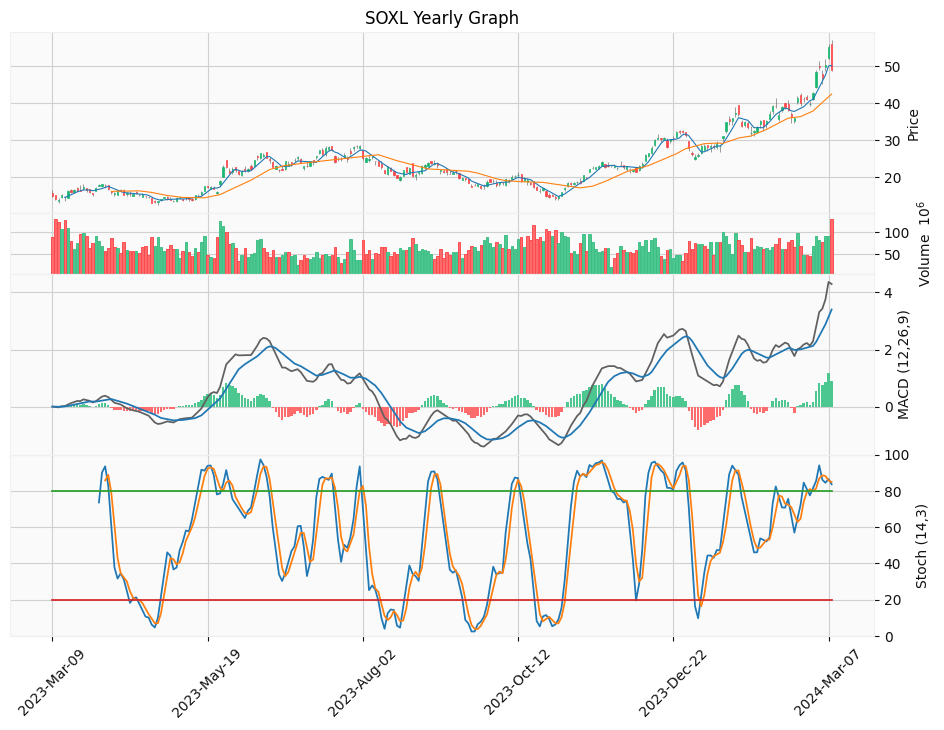

In [3]:
# download yearly stock price data
symbol = 'soxl'     # Enter ticker here
symbol = symbol.upper()

df = yf.download(symbol, period='1y', interval='1d')
title = symbol + ' Yearly Graph'
PlotGraph(df, title)

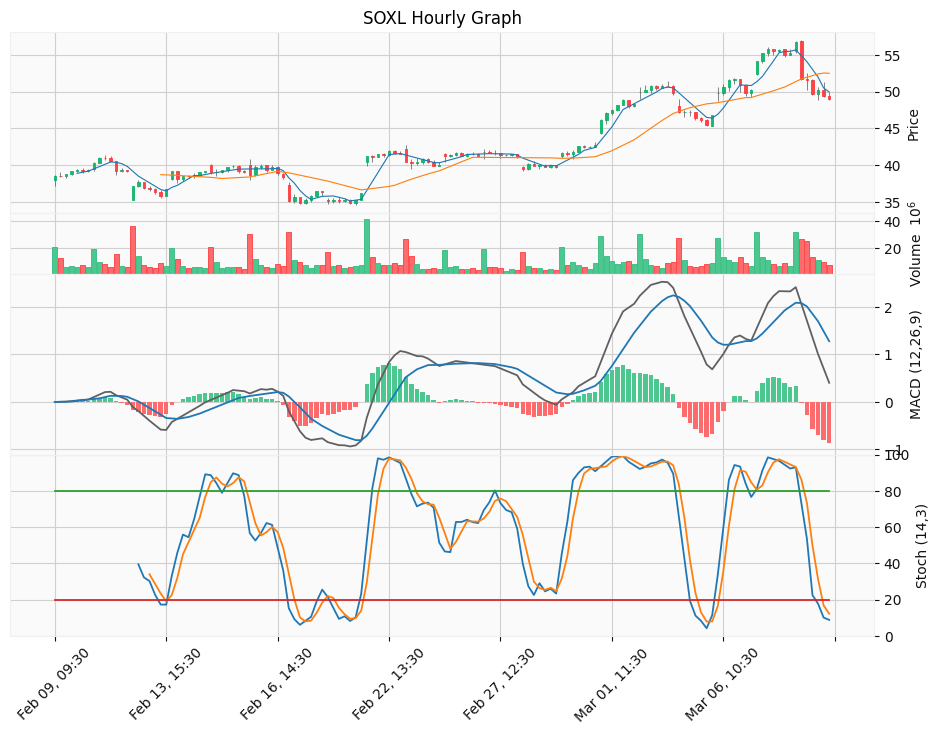

In [4]:
# download hourly stock price data
df = yf.Ticker(symbol).history(period='1mo', interval='1h')
df = df.iloc[:, :5]     # Grab OHLC and Volume col
title = symbol + ' Hourly Graph'
PlotGraph(df, title)